<img src="../../../images/banners/pandas-cropped.jpeg" width="600"/>

<a class="anchor" id="matplotlib_application_interfaces_(apis)"></a>
# <img src="../../../images/logos/pandas.png" width="23"/>  Matplotlib Application Interfaces (APIs)

## <img src="../../../images/logos/toc.png" width="20"/> Table of Contents 
* [Matplotlib Application Interfaces (APIs)](#matplotlib_application_interfaces_(apis))
    * [Native Matplotlib interfaces](#native_matplotlib_interfaces)
        * [The explicit "Axes" interface](#the_explicit_axes_interface)
        * [The implicit "pyplot" interface](#the_implicit_pyplot_interface)
            * [Why be explicit?](#why_be_explicit?)
    * [Third-party library "Data-object" interfaces](#third-party_library_data-object_interfaces)
    * [Summary](#summary)
    * [Appendix: "Axes" interface with data structures](#appendix:_"axes"_interface_with_data_structures)
    * [Appendix: "pylab" interface](#appendix:_"pylab"_interface)

---

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib has two major application interfaces, or styles of using the library:
- An explicit "Axes" interface that uses methods on a Figure or Axes object to create other Artists, and build a visualization step by step. This has also been called an "object-oriented" interface.
- An implicit "pyplot" interface that keeps track of the last Figure and Axes created, and adds Artists to the object it thinks the user wants.

In addition, a number of downstream libraries (like [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas "(in pandas v1.5.1)") and [xarray](https://xarray.pydata.org)) offer
a `plot` method implemented directly on their data classes so that users can
call `data.plot()`.

The difference between these interfaces can be a bit confusing, particularly
given snippets on the web that use one or the other, or sometimes multiple
interfaces in the same example. Here we attempt to point out how the "pyplot"
and downstream interfaces relate to the explicit "Axes" interface to help users
better navigate the library.

<a class="anchor" id="native_matplotlib_interfaces"></a>
## Native Matplotlib interfaces

<a class="anchor" id="the_explicit_axes_interface"></a>
### The explicit "Axes" interface

The "Axes" interface is how Matplotlib is implemented, and many customizations
and fine-tuning end up being done at this level.

This interface works by instantiating an instance of a
[`Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure "matplotlib.figure.Figure") class (`fig` below), using a method
[`subplots`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.subplots "matplotlib.figure.Figure.subplots") method (or similar) on that object to create one or more
[`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes "matplotlib.axes.Axes") objects (`ax` below), and then calling drawing
methods on the Axes (`plot` in this example):

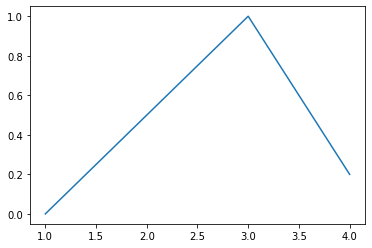

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()
ax.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])

We call this an "explicit" interface because each object is explicitly
referenced, and used to make the next object. Keeping references to the objects
is very flexible, and allows us to customize the objects after they are created,
but before they are displayed.

<a class="anchor" id="the_implicit_pyplot_interface"></a>
### The implicit "pyplot" interface

The [`pyplot`](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot "matplotlib.pyplot") module shadows most of the
[`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes "matplotlib.axes.Axes") plotting methods to give the equivalent of
the above, where the creation of the Figure and Axes is done for the user:

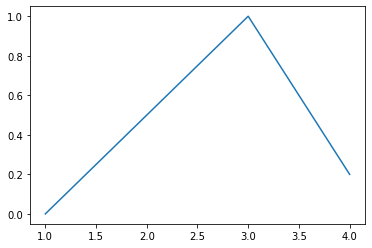

In [4]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [0, 0.5, 1, 0.2])

This can be convenient, particularly when doing interactive work or simple
scripts. A reference to the current Figure can be retrieved using
[`gcf` (get current figure)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gcf.html#matplotlib.pyplot.gcf "matplotlib.pyplot.gcf") and to the current Axes by [`gca` (get current axes)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html#matplotlib.pyplot.gca "matplotlib.pyplot.gca"). The [`pyplot`](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot "matplotlib.pyplot") module
retains a list of Figures, and each Figure retains a list of Axes on the figure
for the user so that the following:

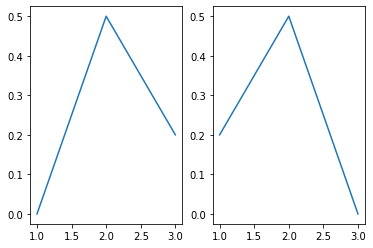

In [8]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

is equivalent to:

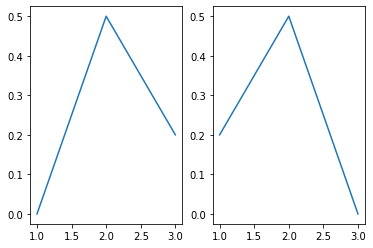

In [9]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
ax = plt.gca()
ax.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
ax = plt.gca()
ax.plot([3, 2, 1], [0, 0.5, 0.2])

In the explicit interface, this would be:

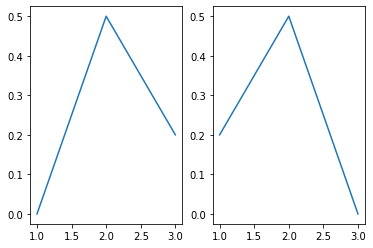

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
axs[0].plot([1, 2, 3], [0, 0.5, 0.2])
axs[1].plot([3, 2, 1], [0, 0.5, 0.2])

<a class="anchor" id="why_be_explicit?"></a>
#### Why be explicit?

What happens if you have to backtrack, and operate on an old axes that is not
referenced by `plt.gca()`? One simple way is to call `subplot` again with
the same arguments. However, that quickly becomes inelegant. You can also
inspect the Figure object and get its list of Axes objects, however, that can be
misleading (colorbars are Axes too!). The best solution is probably to save a
handle to every Axes you create, but if you do that, why not simply create the
all the Axes objects at the start?

The first approach is to call `plt.subplot` again:

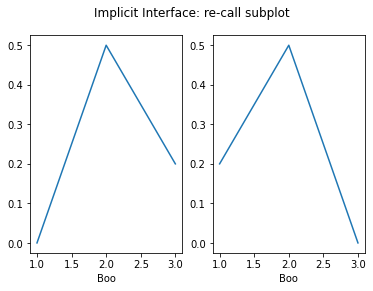

In [11]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: re-call subplot')

for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.xlabel('Boo')

The second is to save a handle:

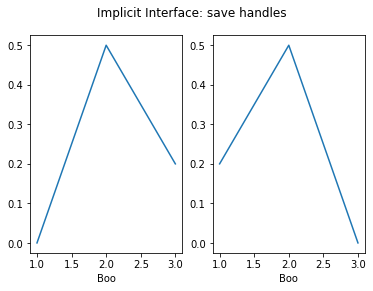

In [12]:
import matplotlib.pyplot as plt

axs = []
ax = plt.subplot(1, 2, 1)
axs += [ax]
plt.plot([1, 2, 3], [0, 0.5, 0.2])

ax = plt.subplot(1, 2, 2)
axs += [ax]
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: save handles')

for i in range(2):
    plt.sca(axs[i])
    plt.xlabel('Boo')

However, the recommended way would be to be explicit from the outset:

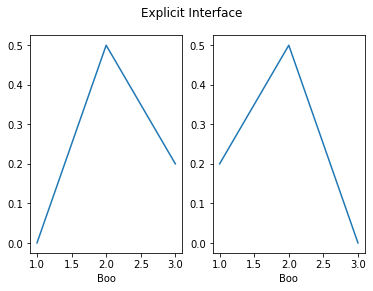

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
axs[0].plot([1, 2, 3], [0, 0.5, 0.2])
axs[1].plot([3, 2, 1], [0, 0.5, 0.2])
fig.suptitle('Explicit Interface')
for i in range(2):
    axs[i].set_xlabel('Boo')

<a class="anchor" id="third-party_library_data-object_interfaces"></a>
## Third-party library "Data-object" interfaces

Some third party libraries have chosen to implement plotting for their data
objects, e.g. `data.plot()`, is seen in [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas "(in pandas v1.5.1)"), [xarray](https://xarray.pydata.org), and other
third-party libraries. For illustrative purposes, a downstream library may
implement a simple data container that has `x` and `y` data stored together,
and then implements a `plot` method:

<AxesSubplot:title={'center':'Plotted from DataClass!'}>

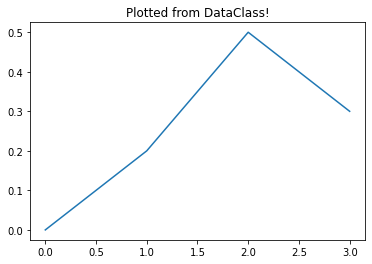

In [14]:
import matplotlib.pyplot as plt

# supplied by downstream library:
class DataContainer:

    def __init__(self, x, y):
        """
        Proper docstring here!
        """
        self._x = x
        self._y = y

    def plot(self, ax=None, **kwargs):
        if ax is None:
            ax = plt.gca()
        ax.plot(self._x, self._y, **kwargs)
        ax.set_title('Plotted from DataClass!')
        return ax


# what the user usually calls:
data = DataContainer([0, 1, 2, 3], [0, 0.2, 0.5, 0.3])
data.plot()

In [26]:
import seaborn as sns

# Pandas Data-object interface
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


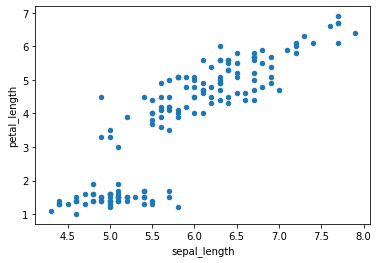

In [27]:
df.plot('sepal_length', 'petal_length', kind='scatter');

So the library can hide all the nitty-gritty from the user, and can make a
visualization appropriate to the data type, often with good labels, choices of
colormaps, and other convenient features.

In the above, however, we may not have liked the title the library provided.
Thankfully, they pass us back the Axes from the `plot()` method, and
understanding the explicit Axes interface, we could call:
`ax.set_title('My preferred title')` to customize the title.

Many libraries also allow their `plot` methods to accept an optional *ax*
argument. This allows us to place the visualization in an Axes that we have
placed and perhaps customized.

<a class="anchor" id="summary"></a>
## Summary

Overall, it is useful to understand the explicit "Axes" interface since it is
the most flexible and underlies the other interfaces. A user can usually
figure out how to drop down to the explicit interface and operate on the
underlying objects. While the explicit interface can be a bit more verbose
to setup, complicated plots will often end up simpler than trying to use
the implicit "pyplot" interface.

> **Note:** It is sometimes confusing to people that we import `pyplot` for both
interfaces. Currently, the `pyplot` module implements the "pyplot"
interface, but it also provides top-level Figure and Axes creation
methods, and ultimately spins up the graphical user interface, if one
is being used. So `pyplot` is still needed regardless of the
interface chosen.

Similarly, the declarative interfaces provided by partner libraries use the
objects accessible by the "Axes" interface, and often accept these as arguments
or pass them back from methods. It is usually essential to use the explicit
"Axes" interface to perform any customization of the default visualization, or
to unpack the data into NumPy arrays and pass directly to Matplotlib.

<a class="anchor" id="appendix:_axes_interface_with_data_structures"></a>
## Appendix: "Axes" interface with data structures

Most [`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes "matplotlib.axes.Axes") methods allow yet another API addressing by passing a
*data* object to the method and specifying the arguments as strings:

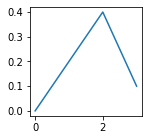

In [28]:
import matplotlib.pyplot as plt

data = {'xdat': [0, 1, 2, 3], 'ydat': [0, 0.2, 0.4, 0.1]}
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot('xdat', 'ydat', data=data)